<a href="https://colab.research.google.com/github/DN554/Churn-Modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#SLICING
df[100:120]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
100,101,15808582,Fu,665,France,Female,40,6,0.00,1,1,1,161848.03,0
101,102,15743192,Hung,623,France,Female,44,6,0.00,2,0,0,167162.43,0
102,103,15580146,Hung,738,France,Male,31,9,82674.15,1,1,0,41970.72,0
103,104,15776605,Bradley,528,Spain,Male,36,7,0.00,2,1,0,60536.56,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
105,106,15613854,Mauldon,622,Spain,Female,46,4,107073.27,2,1,1,30984.59,1
106,107,15599195,Stiger,582,Germany,Male,32,1,88938.62,1,1,1,10054.53,0
107,108,15812878,Parsons,785,Germany,Female,36,2,99806.85,1,0,1,36976.52,0
108,109,15602312,Walkom,605,Spain,Male,33,5,150092.80,1,0,0,71862.79,0
109,110,15744689,T'ang,479,Germany,Male,35,9,92833.89,1,1,0,99449.86,1


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Drop column
df1=df.drop(['CustomerId','Surname'],axis=1)
df1

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df1.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df1.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df1['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [ ]:
df1.Tenure.value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [ ]:
df1['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
df1.Age.value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [ ]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df1.Gender.value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df1['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [ ]:
df1.NumOfProducts.value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
df1['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
df1['EstimatedSalary'].value_counts()

,count
EstimatedSalary,
24924.92,2
121505.61,1
89874.82,1
72500.68,1
182692.80,1
...,...
188377.21,1
55902.93,1
4523.74,1


In [ ]:
# germany and spain ko columns bana hain . making dummies
df2=pd.get_dummies(df1['Geography'])
df2

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
df1=pd.get_dummies(df1,columns=['Geography','Gender'],drop_first=True)
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
# converting true and false into binary
df1['Geography_Germany']=df1['Geography_Germany'].astype(int)
df1['Geography_Spain']=df1['Geography_Spain'].astype(int)
df1['Gender_Male']=df1['Gender_Male'].astype(int)

In [ ]:
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df1.to_excel('Churn_Modelling_new.xlsx')

In [ ]:
df1['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


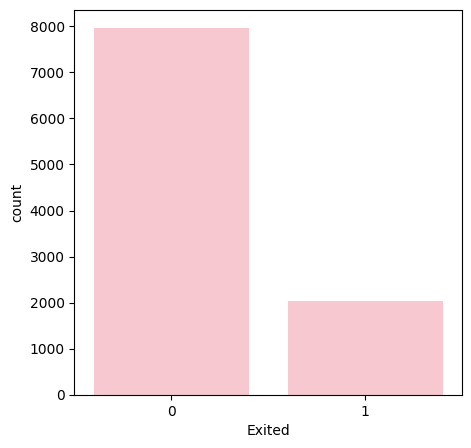

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Exited',data=df1,color="pink")
plt.show()

In [ ]:
df3=df1.corr()
df3

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,1.000000,-0.058109,-0.190782,-0.105937,-0.142662,0.052724,-0.074097,0.009066,-0.118079,-0.202246,-0.142530,0.035148,0.036269
CreditScore,-0.058109,1.000000,-0.218347,-0.082506,-0.117926,0.057827,-0.105240,0.061567,-0.100819,-0.238730,-0.136759,0.067150,-0.039935
Age,-0.190782,-0.218347,1.000000,-0.242906,0.181105,-0.250215,-0.218261,-0.045983,-0.175096,0.703385,0.196765,-0.163296,-0.365967
Tenure,-0.105937,-0.082506,-0.242906,1.000000,-0.164840,0.083039,0.027025,-0.156579,-0.051304,-0.183685,-0.158254,0.077790,0.020185
Balance,-0.142662,-0.117926,0.181105,-0.164840,1.000000,-0.785485,-0.125327,-0.236456,-0.050194,0.492538,0.875250,-0.688481,-0.142490
NumOfProducts,0.052724,0.057827,-0.250215,0.083039,-0.785485,1.000000,0.042265,0.104116,0.033595,-0.366328,-0.472238,0.311776,-0.007050
HasCrCard,-0.074097,-0.105240,-0.218261,0.027025,-0.125327,0.042265,1.000000,-0.103841,-0.121866,-0.146976,-0.095564,0.004165,-0.016266
IsActiveMember,0.009066,0.061567,-0.045983,-0.156579,-0.236456,0.104116,-0.103841,1.000000,-0.127210,-0.527869,-0.290201,0.191326,0.129261
EstimatedSalary,-0.118079,-0.100819,-0.175096,-0.051304,-0.050194,0.033595,-0.121866,-0.127210,1.000000,-0.061442,-0.054828,-0.006593,-0.097511
Exited,-0.202246,-0.238730,0.703385,-0.183685,0.492538,-0.366328,-0.146976,-0.527869,-0.061442,1.000000,0.553805,-0.424940,-0.494193
